In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv("C:\\Users\\Shree\\Downloads\\archive\\student_depression_dataset.csv")  
print(df.head())  


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [2]:
independent_vars = ["Academic Pressure", "Sleep Duration", "Financial Stress"]


In [3]:
for var in independent_vars:
    # Convert to numeric (remove errors)
    x = pd.to_numeric(df[var], errors='coerce')
    y = pd.to_numeric(df["Depression"], errors='coerce')

    # Remove NaN values (missing values)
    valid_indices = ~(np.isnan(x) | np.isnan(y))
    x = x[valid_indices]
    y = y[valid_indices]

In [4]:
linear_coeff = np.polyfit(x, y, 1)
linear_eq = np.poly1d(linear_coeff)

In [5]:
quadratic_coeff = np.polyfit(x, y, 2)
quadratic_eq = np.poly1d(quadratic_coeff)

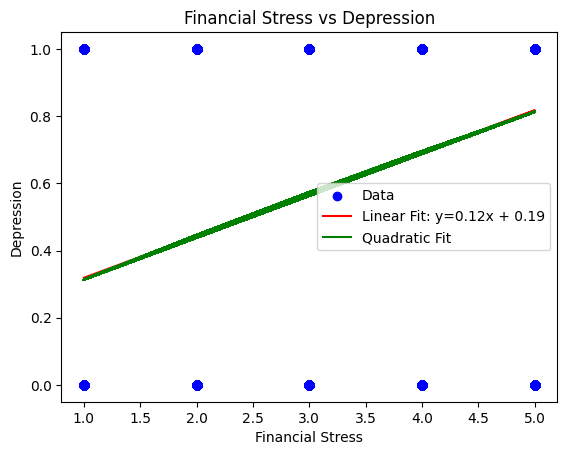

In [6]:
plt.scatter(x, y, label="Data", color="blue")
plt.plot(x, linear_eq(x), label=f"Linear Fit: y={linear_coeff[0]:.2f}x + {linear_coeff[1]:.2f}", color="red")
plt.plot(x, quadratic_eq(x), label="Quadratic Fit", color="green")
plt.xlabel(var)
plt.ylabel("Depression")
plt.title(f"{var} vs Depression")
plt.legend()
plt.show()

In [7]:
try:
    # Calculate Pearson Correlation & P-Value
    correlation, p_value = pearsonr(x, y)

    # Print Correlation & P-Value
    print(f" Pearson Correlation for {var} vs Depression: {correlation:.4f}")
    print(f" P-Value for {var} vs Depression: {p_value:.4f} (Significance Check)\n")

    # Check significance
    if p_value < 0.05:
        print(f" {var} has a **significant** relationship with Depression (p < 0.05)")
    else:
        print(f" {var} does **not** have a significant relationship with Depression (p > 0.05)")

except NameError:
    print("Error: x and y are not defined. Run the curve fitting code first.")


 Pearson Correlation for Financial Stress vs Depression: 0.3636
 P-Value for Financial Stress vs Depression: 0.0000 (Significance Check)

 Financial Stress has a **significant** relationship with Depression (p < 0.05)


In [8]:
# Columns we'll use for prediction
features = ["Academic Pressure", "Sleep Duration", "Financial Stress"]

# Drop rows with missing values
df_clean = df[features + ["Depression"]].dropna()

# Label Encode categorical columns BEFORE train-test split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in features:
    if df_clean[col].dtype == 'object':
        df_clean[col] = encoder.fit_transform(df_clean[col])

# Split into X (features) and y (target)
X = df_clean[features]
y = df_clean["Depression"]


In [9]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.naive_bayes import GaussianNB

# Create and train model
model = GaussianNB()
model.fit(X_train, y_train)




GaussianNB()

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7586454040494535

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      2343
           1       0.77      0.83      0.80      3238

    accuracy                           0.76      5581
   macro avg       0.75      0.74      0.75      5581
weighted avg       0.76      0.76      0.76      5581



In [12]:
new_data = pd.DataFrame({
    "Academic Pressure": [2],         
    "Sleep Duration": [1],            
    "Financial Stress": [2]           
})
prediction = model.predict(new_data)
print("Predicted Depression Level:", prediction[0])


Predicted Depression Level: 0


In [13]:
sample_data = pd.DataFrame({
    "Academic Pressure": [0, 1, 2],      
    "Sleep Duration": [0, 1, 2],         
    "Financial Stress": [0, 1, 2]        
})
sample_predictions = model.predict(sample_data)
for i, pred in enumerate(sample_predictions):
    print(f"Student {i+1} → Predicted Depression Level: {pred}")


Student 1 → Predicted Depression Level: 0
Student 2 → Predicted Depression Level: 0
Student 3 → Predicted Depression Level: 0


In [14]:
probs = model.predict_proba(new_data)

for i, class_label in enumerate(model.classes_):
    print(f"Probability of Depression Level {class_label}: {probs[0][i]:.4f}")


Probability of Depression Level 0: 0.6262
Probability of Depression Level 1: 0.3738


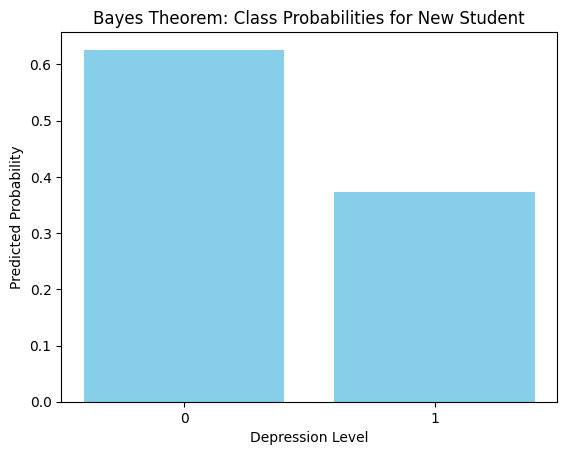

In [15]:
plt.bar([str(c) for c in model.classes_], probs[0], color='skyblue')
plt.xlabel("Depression Level")
plt.ylabel("Predicted Probability")
plt.title("Bayes Theorem: Class Probabilities for New Student")
plt.show()


In [18]:
df_clean['Depressed_Binary'] = (df_clean["Depression"] > 5).astype(int)
df_clean[['Depression', 'Depressed_Binary']].head()


,Depression,Depressed_Binary
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0


In [22]:
p = df_clean['Depressed_Binary'].mean()
print(f"Probability of being depressed (p): {p:.4f}")


Probability of being depressed (p): 0.0000


In [23]:
from scipy.stats import binom
n = 10  
k = 7   
prob_7_depressed = binom.pmf(k, n, p)
print(f"Probability of exactly 7 out of 10 students being depressed: {prob_7_depressed:.4f}")


Probability of exactly 7 out of 10 students being depressed: 0.0000


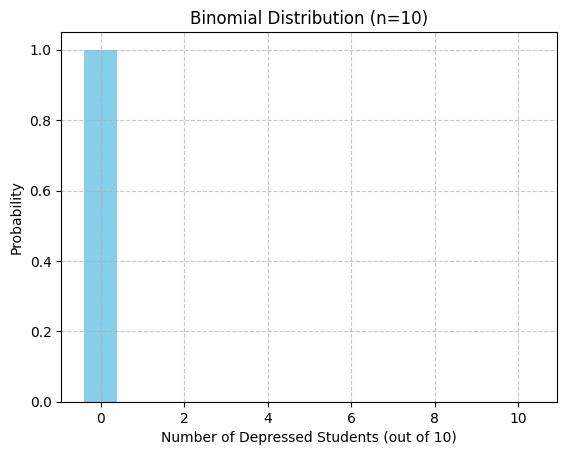

In [24]:
import matplotlib.pyplot as plt
x_vals = list(range(n + 1))
probs = [binom.pmf(k, n, p) for k in x_vals]
plt.bar(x_vals, probs, color='skyblue')
plt.xlabel("Number of Depressed Students (out of 10)")
plt.ylabel("Probability")
plt.title("Binomial Distribution (n=10)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [25]:
cumulative_prob = binom.cdf(7, n, p)
print(f"Cumulative Probability of ≤7 depressed out of 10: {cumulative_prob:.4f}")

Cumulative Probability of ≤7 depressed out of 10: 1.0000


In [26]:
from scipy.stats import poisson
lambda_val = 3  
k = 5           


In [27]:
prob_5 = poisson.pmf(k, mu=lambda_val)
print(f"Probability of exactly 5 depressed students in a class: {prob_5:.4f}")


Probability of exactly 5 depressed students in a class: 0.1008


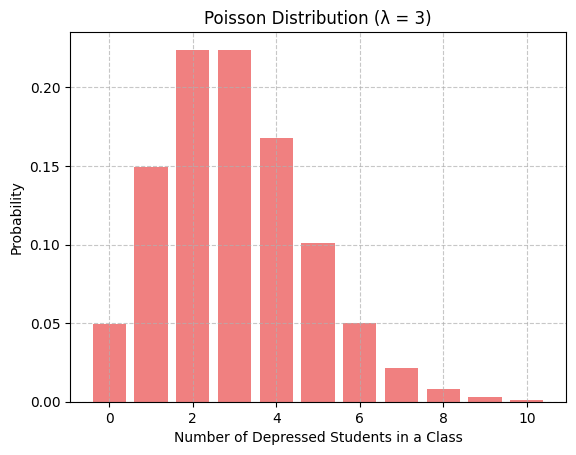

In [28]:
import matplotlib.pyplot as plt
x_vals = list(range(0, 11))
poisson_probs = [poisson.pmf(x, mu=lambda_val) for x in x_vals]
plt.bar(x_vals, poisson_probs, color='lightcoral')
plt.xlabel("Number of Depressed Students in a Class")
plt.ylabel("Probability")
plt.title("Poisson Distribution (λ = 3)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [29]:
cum_prob = poisson.cdf(5, mu=lambda_val)
print(f"Cumulative probability of ≤5 depressed students: {cum_prob:.4f}")


Cumulative probability of ≤5 depressed students: 0.9161


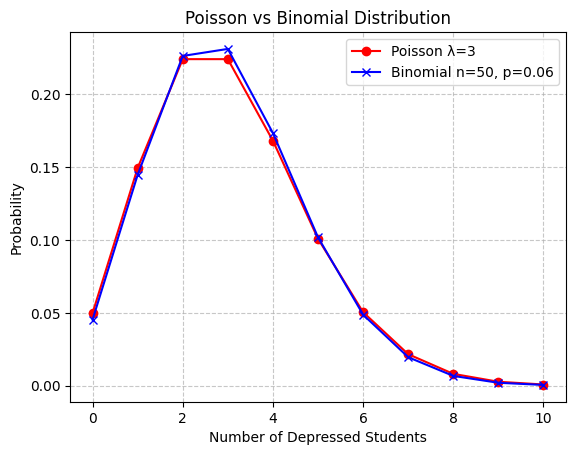

In [30]:
from scipy.stats import binom

n = 50
p = 0.06
binom_probs = [binom.pmf(k, n, p) for k in x_vals]

plt.plot(x_vals, poisson_probs, marker='o', label='Poisson λ=3', color='red')
plt.plot(x_vals, binom_probs, marker='x', label='Binomial n=50, p=0.06', color='blue')
plt.title("Poisson vs Binomial Distribution")
plt.xlabel("Number of Depressed Students")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [31]:
from scipy.stats import geom
p = 0.3
k = 4

geo_prob = geom.pmf(k, p)
print(f"Probability of first success on {k}th trial: {geo_prob:.4f}")


Probability of first success on 4th trial: 0.1029


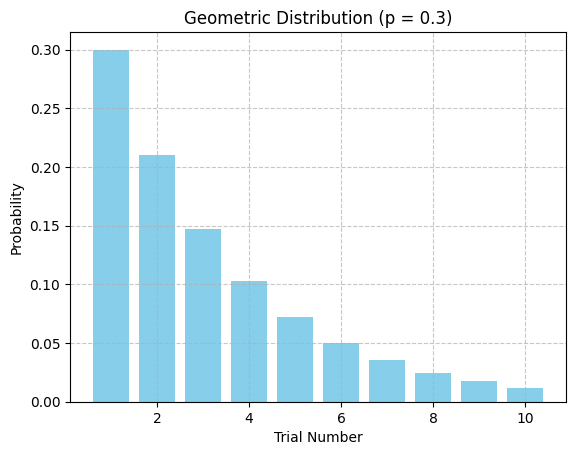

In [32]:
x_vals = list(range(1, 11))
geo_probs = [geom.pmf(k, p) for k in x_vals]

plt.bar(x_vals, geo_probs, color='skyblue')
plt.title("Geometric Distribution (p = 0.3)")
plt.xlabel("Trial Number")
plt.ylabel("Probability")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


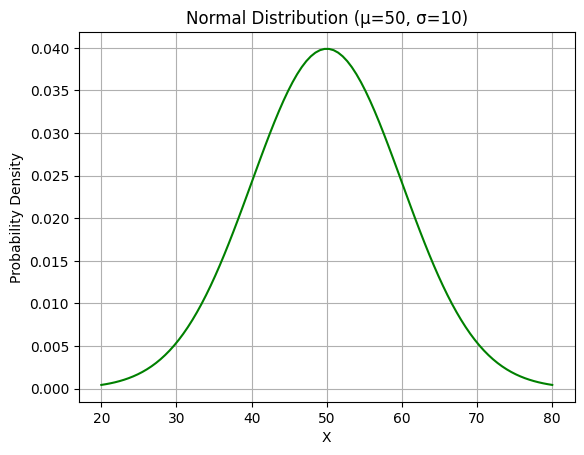

In [33]:
from scipy.stats import norm
import numpy as np

mu = 50   
sigma = 10  

x = np.linspace(20, 80, 100)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, color='green')
plt.title("Normal Distribution (μ=50, σ=10)")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()


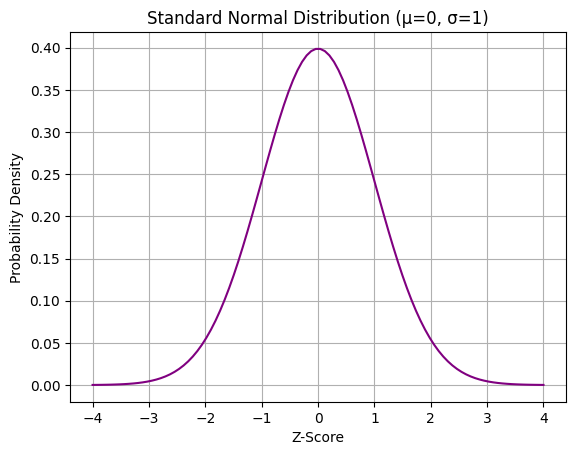

In [34]:
z = np.linspace(-4, 4, 100)
y = norm.pdf(z, 0, 1)

plt.plot(z, y, color='purple')
plt.title("Standard Normal Distribution (μ=0, σ=1)")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()


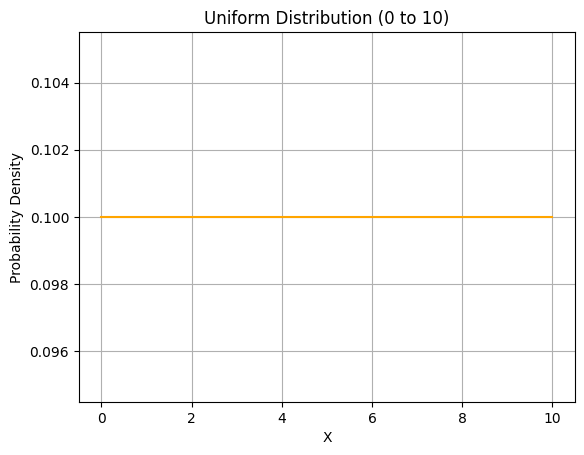

In [35]:
from scipy.stats import uniform

a = 0
b = 10
x = np.linspace(a, b, 100)
y = uniform.pdf(x, loc=a, scale=b-a)

plt.plot(x, y, color='orange')
plt.title("Uniform Distribution (0 to 10)")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()


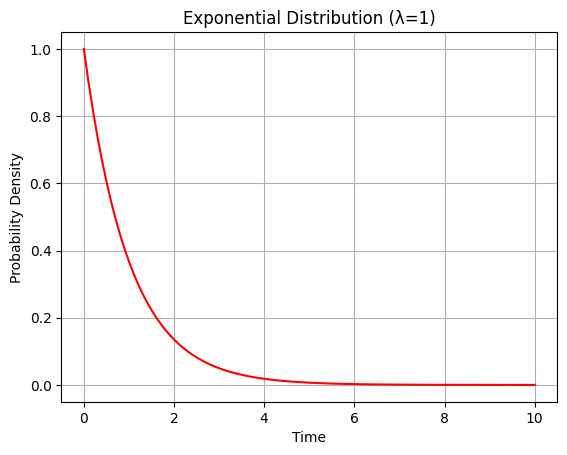

In [36]:
from scipy.stats import expon

lambda_val = 1  # rate
x = np.linspace(0, 10, 100)
y = expon.pdf(x, scale=1/lambda_val)

plt.plot(x, y, color='red')
plt.title("Exponential Distribution (λ=1)")
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()


In [37]:
population = pd.to_numeric(df["Academic Pressure"], errors='coerce').dropna()
print(" Population size:", len(population))


 Population size: 27901


In [38]:
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))


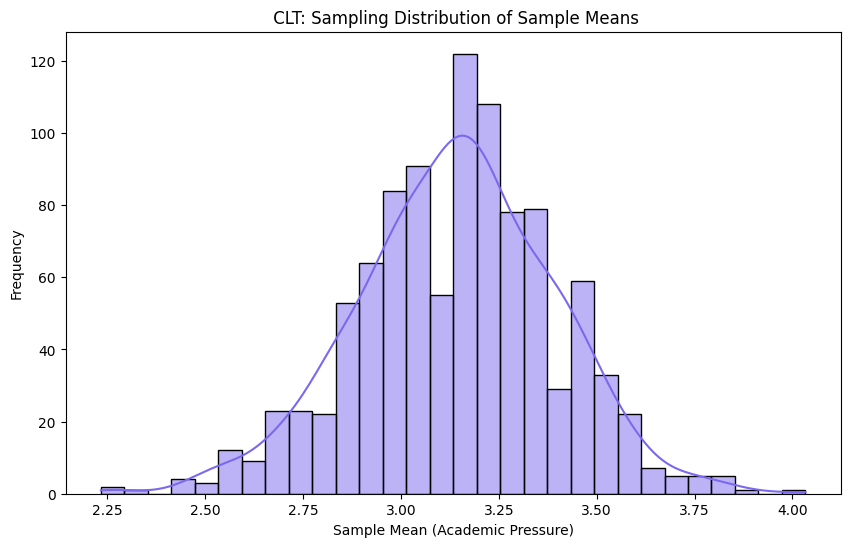

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(sample_means, bins=30, kde=True, color='mediumslateblue')
plt.title(" CLT: Sampling Distribution of Sample Means")
plt.xlabel("Sample Mean (Academic Pressure)")
plt.ylabel("Frequency")
plt.show()


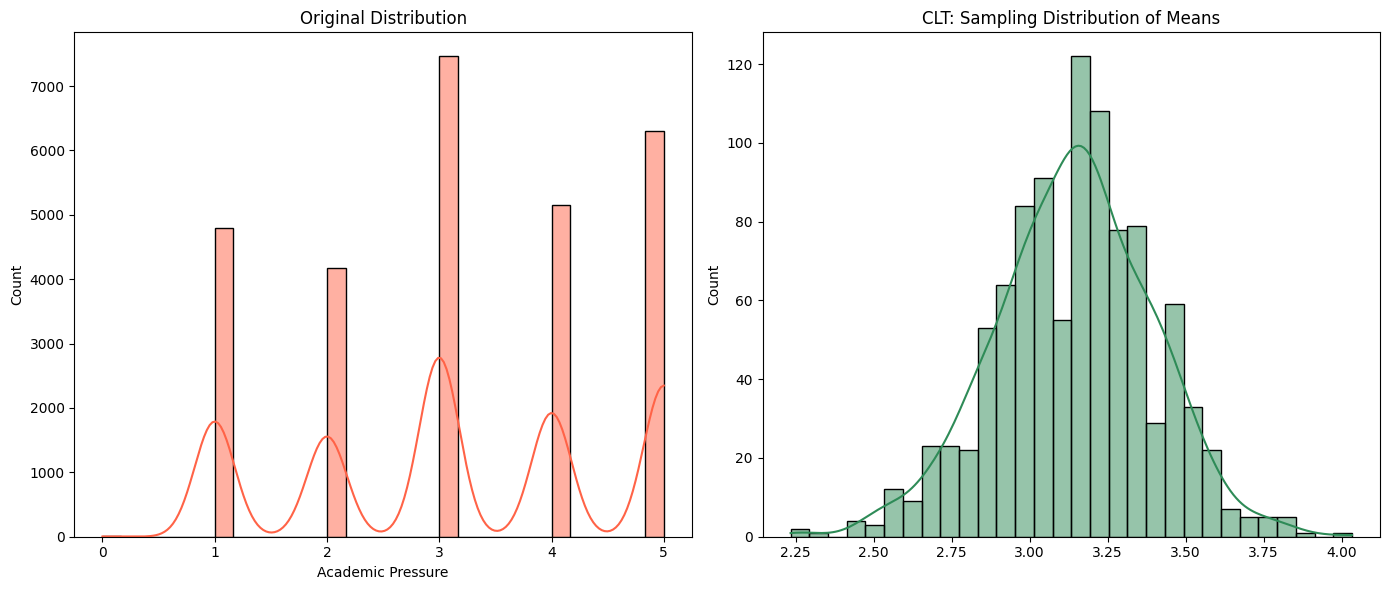

In [40]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(population, bins=30, kde=True, color='tomato')
plt.title("Original Distribution")
plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=30, kde=True, color='seagreen')
plt.title("CLT: Sampling Distribution of Means")

plt.tight_layout()
plt.show()


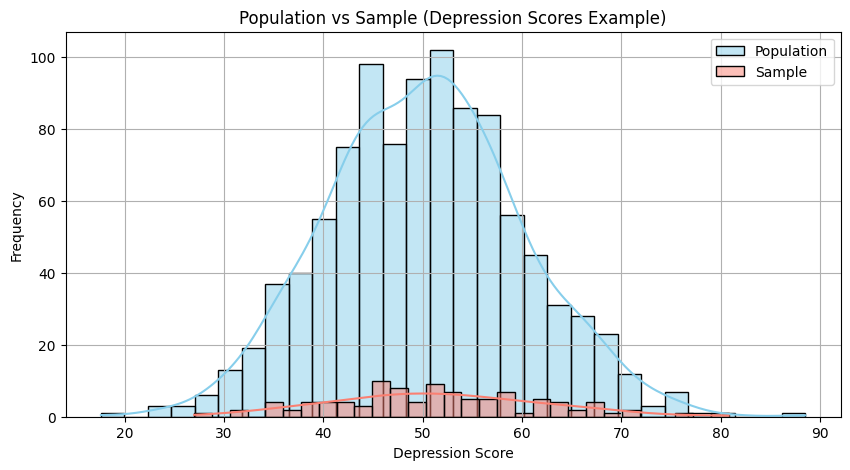

In [41]:
np.random.seed(42)
population = np.random.normal(loc=50, scale=10, size=1000)  # Mean=50, SD=10
sample = np.random.choice(population, size=100, replace=False)

plt.figure(figsize=(10, 5))
sns.histplot(population, bins=30, color="skyblue", label="Population", kde=True)
sns.histplot(sample, bins=30, color="salmon", label="Sample", kde=True)
plt.title("Population vs Sample (Depression Scores Example)")
plt.xlabel("Depression Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import scipy.stats as stats

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  
n = len(sample)
confidence = 0.95
z_critical = stats.norm.ppf((1 + confidence) / 2)  

margin_of_error = z_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval for Population Mean: [{ci_lower:.2f}, {ci_upper:.2f}]")


Sample Mean: 51.38
95% Confidence Interval for Population Mean: [49.34, 53.43]


In [43]:
population = df_clean["Sleep Duration"]
sample_with_replacement = population.sample(n=100, replace=True, random_state=1)
sample_without_replacement = population.sample(n=100, replace=False, random_state=1)

print("With Replacement:")
print(f"Mean: {sample_with_replacement.mean():.2f}, Std Dev: {sample_with_replacement.std():.2f}\n")
print("Without Replacement:")
print(f"Mean: {sample_without_replacement.mean():.2f}, Std Dev: {sample_without_replacement.std():.2f}")


With Replacement:
Mean: 1.57, Std Dev: 1.06

Without Replacement:
Mean: 1.58, Std Dev: 1.20


In [44]:
population_data = df_clean["Academic Pressure"]

true_mean = population_data.mean()
true_variance = population_data.var(ddof=0)  

print("Population Parameters (Academic Pressure):")
print(f"Mean: {true_mean:.2f}")
print(f"Variance: {true_variance:.2f}")


Population Parameters (Academic Pressure):
Mean: 3.14
Variance: 1.91


In [45]:
sample_data = population_data.sample(n=100, random_state=42)
sample_mean = sample_data.mean()
sample_variance = sample_data.var(ddof=1)  
sample_std = sample_data.std(ddof=1)      

print("Sample Statistics (Academic Pressure):")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}")


Sample Statistics (Academic Pressure):
Sample Mean: 3.23
Sample Variance: 2.02
Sample Std Dev: 1.42


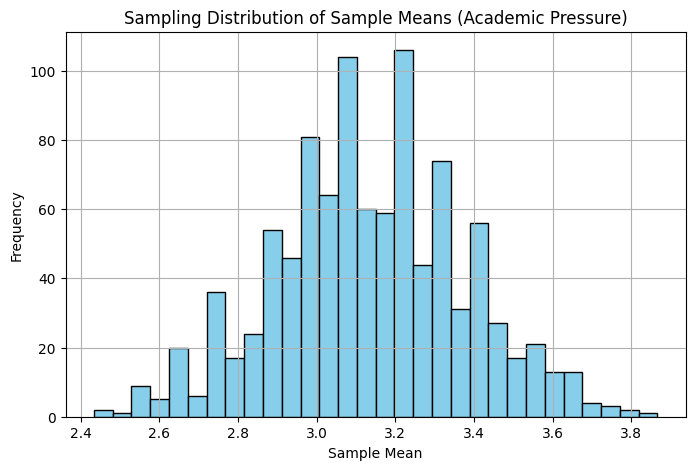

In [46]:
sample_means = []

for i in range(1000): 
    sample = population_data.sample(n=30) 
    sample_means.append(sample.mean())

plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=30, edgecolor='black', color='skyblue')
plt.title("Sampling Distribution of Sample Means (Academic Pressure)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [47]:
data_column = df_clean["Academic Pressure"]

# Set sample size and number of samples
sample_size = 30
num_samples = 100

# Draw multiple samples and compute their means
sample_means = [np.mean(np.random.choice(data_column, size=sample_size, replace=True)) for _ in range(num_samples)]

print(f"First 10 Sample Means:\n{sample_means[:10]}")


First 10 Sample Means:
[2.6333333333333333, 3.2, 3.1666666666666665, 3.1, 2.8, 3.3666666666666667, 3.533333333333333, 3.3666666666666667, 3.1333333333333333, 2.8333333333333335]


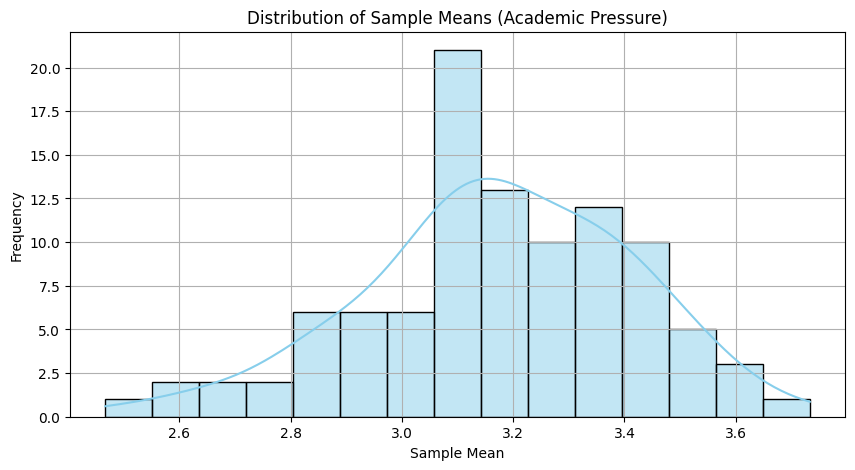

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(sample_means, bins=15, kde=True, color="skyblue")
plt.title("Distribution of Sample Means (Academic Pressure)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


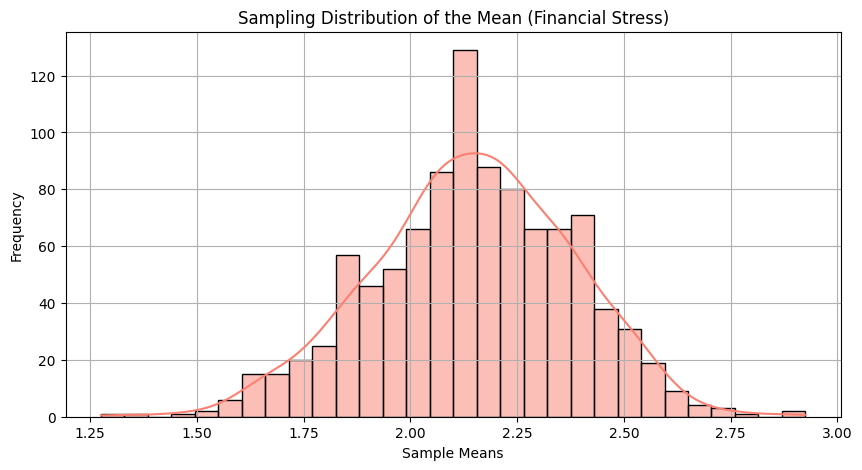

In [50]:
data = df_clean["Financial Stress"]
sample_size = 40
num_samples = 1000

sample_means = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(num_samples)]

plt.figure(figsize=(10,5))
sns.histplot(sample_means, bins=30, kde=True, color='salmon')
plt.title("Sampling Distribution of the Mean (Financial Stress)")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [52]:
print(f"Mean of Sampling Distribution: {np.mean(sample_means):.2f}")
print(f"Standard Deviation of Sampling Distribution: {np.std(sample_means):.2f}")


Mean of Sampling Distribution: 2.14
Standard Deviation of Sampling Distribution: 0.23


In [53]:
sample_ap = df_clean["Academic Pressure"].sample(50, random_state=1)
sample_variance = np.var(sample_ap, ddof=1) 

print(f"Sample Variance of Academic Pressure (n=50): {sample_variance:.2f}")


Sample Variance of Academic Pressure (n=50): 1.85


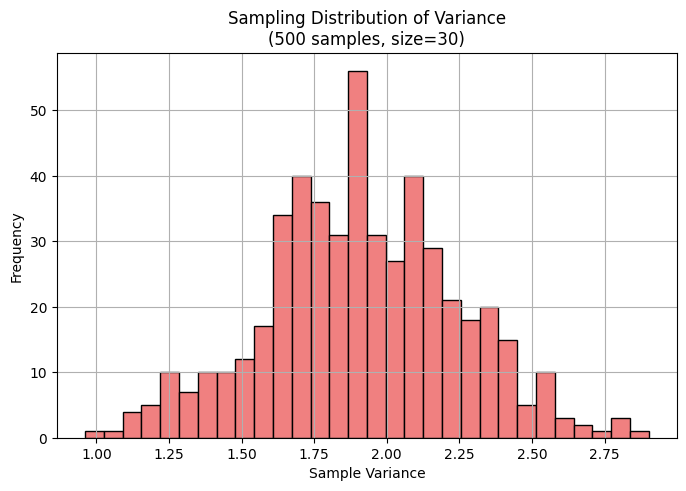

In [57]:
num_samples = 500
sample_size = 30
variances = []
for _ in range(num_samples):
    sample = df_clean["Academic Pressure"].sample(sample_size, replace=True)
    var = np.var(sample, ddof=1) 
    variances.append(var)

plt.figure(figsize=(8,5))
plt.hist(variances, bins=30, color='lightcoral', edgecolor='black')
plt.title(f"Sampling Distribution of Variance\n({num_samples} samples, size={sample_size})")
plt.xlabel("Sample Variance")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [62]:
from scipy import stats

sample = df_clean["Academic Pressure"].sample(30, random_state=42)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)
mu_0 = 3  
t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-1))

print("Sample Mean:", round(sample_mean, 3))
print("Sample Std Dev:", round(sample_std, 3))
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))

if p_value < 0.05:
    print("Result: Reject the null hypothesis – population mean ≠ 3")
else:
    print("Result: Fail to reject null hypothesis – population mean ≈ 3")


Sample Mean: 3.1
Sample Std Dev: 1.494
t-statistic: 0.367
p-value: 0.7165
Result: Fail to reject null hypothesis – population mean ≈ 3


In [64]:
true_mean = np.mean(df_clean["Academic Pressure"])
true_variance = np.var(df_clean["Academic Pressure"])
sample_means = []
sample_vars = []

for _ in range(1000):
    sample = df_clean["Academic Pressure"].sample(30, replace=False)
    sample_means.append(np.mean(sample))           
    sample_vars.append(np.var(sample, ddof=1))     

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_vars = np.mean(sample_vars)

print("True Population Mean:", round(true_mean, 3))
print("Avg of Sample Means (Unbiased?):", round(mean_of_sample_means, 3))

print("\nTrue Population Variance:", round(true_variance, 3))
print("Avg of Sample Variances (Unbiased?):", round(mean_of_sample_vars, 3))
print("\nVariance of Sample Means (Efficiency measure):", round(np.var(sample_means), 5))


True Population Mean: 3.141
Avg of Sample Means (Unbiased?): 3.138

True Population Variance: 1.908
Avg of Sample Variances (Unbiased?): 1.912

Variance of Sample Means (Efficiency measure): 0.06734


In [66]:
sample = df_clean["Academic Pressure"].sample(30, replace=False)
point_estimate = np.mean(sample)
confidence = 0.95
n = len(sample)
sample_std = np.std(sample, ddof=1)
standard_error = sample_std / np.sqrt(n)
t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)
margin_error = t_critical * standard_error

ci_lower = point_estimate - margin_error
ci_upper = point_estimate + margin_error

print(f"Point Estimate (Sample Mean): {round(point_estimate, 2)}")
print(f"{int(confidence*100)}% Confidence Interval: ({round(ci_lower, 2)}, {round(ci_upper, 2)})")


Point Estimate (Sample Mean): 3.0
95% Confidence Interval: (2.49, 3.51)


In [120]:
import scipy.stats as stats
df_hyp = df_clean.copy()

if df_hyp['Academic Pressure'].dtype == 'object':
    df_hyp['Academic Pressure'] = LabelEncoder().fit_transform(df_hyp['Academic Pressure'])

if df_hyp['Depression'].dtype == 'object':
    df_hyp['Depression'] = LabelEncoder().fit_transform(df_hyp['Depression'])
median_pressure = df_hyp['Academic Pressure'].median()
low_pressure = df_hyp[df_hyp['Academic Pressure'] < median_pressure]['Depression']
high_pressure = df_hyp[df_hyp['Academic Pressure'] >= median_pressure]['Depression']
t_stat, p_val = stats.ttest_ind(low_pressure, high_pressure)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant difference in depression levels based on academic pressure.")
else:
    print("No significant difference in depression levels based on academic pressure.")



T-statistic: -79.5027665612418
P-value: 0.0
Significant difference in depression levels based on academic pressure.


In [124]:
df_hyp2 = df_clean.copy()

if df_hyp2['Sleep Duration'].dtype == 'object':
    df_hyp2['Sleep Duration'] = LabelEncoder().fit_transform(df_hyp2['Sleep Duration'])

if df_hyp2['Depression'].dtype == 'object':
    df_hyp2['Depression'] = LabelEncoder().fit_transform(df_hyp2['Depression'])

median_sleep = df_hyp2['Sleep Duration'].median()
less_sleep = df_hyp2[df_hyp2['Sleep Duration'] < median_sleep]['Depression']
more_sleep = df_hyp2[df_hyp2['Sleep Duration'] >= median_sleep]['Depression']

t_stat2, p_val2 = stats.ttest_ind(less_sleep, more_sleep)

print("T-statistic:", t_stat2)
print("P-value:", p_val2)

if p_val2 < 0.05:
    print("Reject Null Hypothesis: Sleep duration does affect depression levels.")
else:
    print("Fail to Reject Null Hypothesis: No strong evidence that sleep duration affects depression levels.")



T-statistic: -0.8075711636270098
P-value: 0.41934437753443365
Fail to Reject Null Hypothesis: No strong evidence that sleep duration affects depression levels.


In [128]:
df_hyp3 = df_clean.copy()

if df_hyp3['Financial Stress'].dtype == 'object':
    df_hyp3['Financial Stress'] = LabelEncoder().fit_transform(df_hyp3['Financial Stress'])
if df_hyp3['Depression'].dtype == 'object':
    df_hyp3['Depression'] = LabelEncoder().fit_transform(df_hyp3['Depression'])
median_stress = df_hyp3['Financial Stress'].median()
low_stress = df_hyp3[df_hyp3['Financial Stress'] < median_stress]['Depression']
high_stress = df_hyp3[df_hyp3['Financial Stress'] >= median_stress]['Depression']
t_stat3, p_val3 = stats.ttest_ind(low_stress, high_stress)

print("T-statistic:", t_stat3)
print("P-value:", p_val3)

if p_val3 < 0.05:
    print("Significant result: Reject Null Hypothesis — Financial stress significantly affects depression.")
else:
    print("Not significant: Fail to Reject Null Hypothesis — No strong evidence of impact.")


T-statistic: -57.5207531563758
P-value: 0.0
Significant result: Reject Null Hypothesis — Financial stress significantly affects depression.


In [132]:
df_type_err = df_clean.copy()

if df_type_err['Academic Pressure'].dtype == 'object':
    df_type_err['Academic Pressure'] = LabelEncoder().fit_transform(df_type_err['Academic Pressure'])

if df_type_err['Depression'].dtype == 'object':
    df_type_err['Depression'] = LabelEncoder().fit_transform(df_type_err['Depression'])

median_pressure = df_type_err['Academic Pressure'].median()
low_pressure = df_type_err[df_type_err['Academic Pressure'] < median_pressure]['Depression']
high_pressure = df_type_err[df_type_err['Academic Pressure'] >= median_pressure]['Depression']

t_stat_err, p_val_err = stats.ttest_ind(low_pressure, high_pressure)

alpha = 0.05  

print("T-statistic:", t_stat_err)
print("P-value:", p_val_err)

if p_val_err < alpha:
    print("Type I Error Risk Present (Rejecting H0 even if true)")
else:
    print("Type II Error Risk Present (Failing to Reject H0 even if false)")

print("\nInterpretation:")
print("- Type I Error: Concluding academic pressure affects depression when it actually doesn't.")
print("- Type II Error: Missing the effect of academic pressure when it's actually there.")



T-statistic: -79.5027665612418
P-value: 0.0
Type I Error Risk Present (Rejecting H0 even if true)

Interpretation:
- Type I Error: Concluding academic pressure affects depression when it actually doesn't.
- Type II Error: Missing the effect of academic pressure when it's actually there.


In [134]:
alpha_1 = 0.01
alpha_5 = 0.05
alpha_10 = 0.10

print("P-value:", p_val_err)

if p_val_err < alpha_1:
    print("Result is significant at 1% level — very strong evidence against H0")
elif p_val_err < alpha_5:
    print("Result is significant at 5% level — strong evidence against H0")
elif p_val_err < alpha_10:
    print("Result is significant at 10% level — moderate evidence against H0")
else:
    print("Not significant at standard levels — fail to reject H0")


P-value: 0.0
Result is significant at 1% level — very strong evidence against H0


In [138]:
from scipy.stats import norm

sleep_data = df_clean["Sleep Duration"]
mean_sleep = sleep_data.mean()
std_sleep = sleep_data.std()

print("Mean Sleep Duration:", round(mean_sleep, 2))
print("Standard Deviation:", round(std_sleep, 2))

threshold = 5
prob_less_than_5 = norm.cdf(threshold, loc=mean_sleep, scale=std_sleep)

print(f"Probability of student sleeping < {threshold} hrs: {round(prob_less_than_5 * 100, 2)}%")


Mean Sleep Duration: 1.51
Standard Deviation: 1.06
Probability of student sleeping < 5 hrs: 99.95%


In [140]:
mu = 6  
sleep_data = df_clean["Sleep Duration"]
n = len(sleep_data)
sample_mean = sleep_data.mean()
sample_std = sleep_data.std()

z = (sample_mean - mu) / (sample_std / np.sqrt(n))

print("Sample Mean:", round(sample_mean, 2))
print("Hypothesized Mean:", mu)
print("Z-statistic:", round(z, 2))

p_value_one_tail = 1 - norm.cdf(z)
print("One-Tailed Test (H1: μ > 6) → p-value:", round(p_value_one_tail, 4))

p_value_two_tail = 2 * (1 - norm.cdf(abs(z)))
print("Two-Tailed Test (H1: μ ≠ 6) → p-value:", round(p_value_two_tail, 4))


Sample Mean: 1.51
Hypothesized Mean: 6
Z-statistic: -705.24
One-Tailed Test (H1: μ > 6) → p-value: 1.0
Two-Tailed Test (H1: μ ≠ 6) → p-value: 0.0


In [150]:
from statsmodels.stats.weightstats import ztest

group1 = df_clean[df_clean['Depression'] == 1]['Academic Pressure']
group2 = df_clean[df_clean['Depression'] == 0]['Academic Pressure']

print("Group 1 Size (Depressed):", len(group1))
print("Group 2 Size (Not Depressed):", len(group2))

if len(group1) > 0 and len(group2) > 0:
    z_stat, p_value = ztest(group1, group2)
    print("Z-Test Result")
    print("Z-statistic:", z_stat)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("Significant difference (Reject H0)")
    else:
        print("No significant difference (Fail to reject H0)")
else:
    print("Z-test can't be performed: one of the groups is empty.")
print(df_clean['Depression'].unique())



Group 1 Size (Depressed): 16336
Group 2 Size (Not Depressed): 11565
Z-Test Result
Z-statistic: 90.1192088671092
P-value: 0.0
Significant difference (Reject H0)
[1 0]


In [154]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(group1, group2)

print("T-Test Result")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant difference between groups (Reject H0)")
else:
    print("No significant difference (Fail to reject H0)")


T-Test Result
T-statistic: 90.1192088671092
P-value: 0.0
Significant difference between groups (Reject H0)


In [158]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_clean['Financial Stress'], df_clean['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test")
print("Chi2 Statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("Variables are dependent (Reject H0)")
else:
    print("Variables are independent (Fail to reject H0)")


Chi-Square Test
Chi2 Statistic: 3703.103868889851
P-value: 0.0
Variables are dependent (Reject H0)


In [164]:
from scipy.stats import f_oneway

sleep_yes = df_clean[df_clean['Depression'] == 'Yes']['Sleep Duration']
sleep_no = df_clean[df_clean['Depression'] == 'No']['Sleep Duration']
f_stat, p_val = f_oneway(sleep_yes, sleep_no)

print("F-Test Result")
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Variance differs significantly (Reject H0)")
else:
    print("No significant difference in variance (Fail to reject H0)")


F-Test Result
F-statistic: nan
P-value: nan
No significant difference in variance (Fail to reject H0)


C:\Users\Shree\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [168]:
from scipy.stats import f_oneway

sleep_groups = df_clean.groupby('Sleep Duration')['Academic Pressure'].apply(list)
valid_groups = [group for group in sleep_groups if len(group) > 1]
if len(valid_groups) >= 2:
    f_stat, p_value = f_oneway(*valid_groups)
    print("ANOVA Result")
    print("F-statistic:", f_stat)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("Significant difference between group means (Reject H0)")
    else:
        print("No significant difference (Fail to reject H0)")
else:
    print("Not enough valid groups for ANOVA test.")


ANOVA Result
F-statistic: 15.4401455692378
P-value: 1.2772500452047347e-12
Significant difference between group means (Reject H0)


Correlation Matrix:
                   Academic Pressure  Sleep Duration  Financial Stress  \
Academic Pressure           1.000000       -0.006369          0.151488   
Sleep Duration             -0.006369        1.000000         -0.002278   
Financial Stress            0.151488       -0.002278          1.000000   
Depression                  0.474835       -0.022411          0.363382   
Depressed_Binary                 NaN             NaN               NaN   

                   Depression  Depressed_Binary  
Academic Pressure    0.474835               NaN  
Sleep Duration      -0.022411               NaN  
Financial Stress     0.363382               NaN  
Depression           1.000000               NaN  
Depressed_Binary          NaN               NaN  


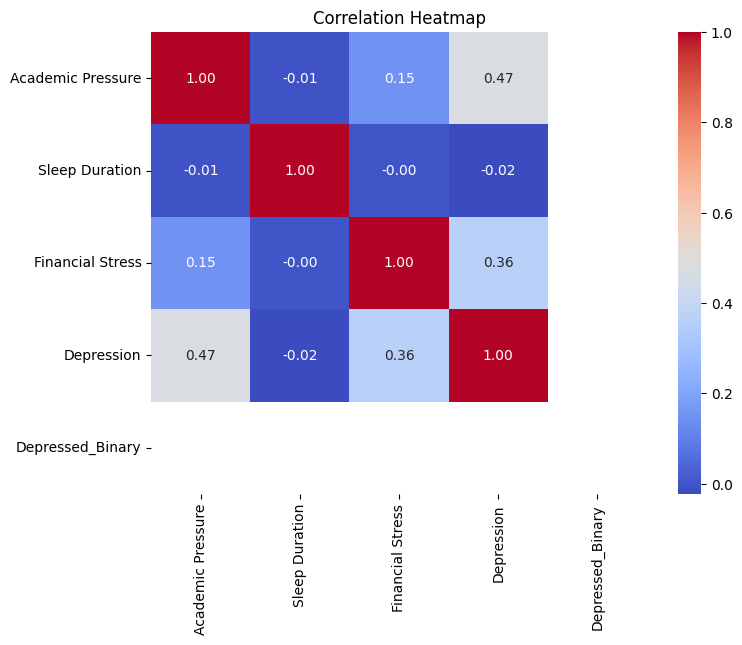

In [170]:
correlation_matrix = df_clean.corr(numeric_only=True)

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [174]:
print("Coefficient of Correlation with Depression:\n")

for col in features:
    if df_clean[col].dtype != 'object':  
        corr = df_clean['Depression'].corr(df_clean[col])
        print(f"{col} ↔ Depression: {corr:.3f}")


Coefficient of Correlation with Depression:

Academic Pressure ↔ Depression: 0.475
Sleep Duration ↔ Depression: -0.022
Financial Stress ↔ Depression: 0.363


In [178]:
print("Probable Error (PE) for correlation coefficients:\n")

n = len(df_clean)

for col in features:
    if df_clean[col].dtype != 'object':
        r = df_clean['Depression'].corr(df_clean[col])
        PE = 0.6745 * (1 - r**2)**0.5 / np.sqrt(n)

        print(f"{col} ↔ Depression:")
        print(f"   Correlation (r): {r:.3f}")
        print(f"   Probable Error (PE): {PE:.4f}")

        if abs(r) > 6 * PE:
            print("   Correlation is significant.\n")
        else:
            print("   Correlation is not significant.\n")


Probable Error (PE) for correlation coefficients:

Academic Pressure ↔ Depression:
   Correlation (r): 0.475
   Probable Error (PE): 0.0036
   Correlation is significant.

Sleep Duration ↔ Depression:
   Correlation (r): -0.022
   Probable Error (PE): 0.0040
   Correlation is not significant.

Financial Stress ↔ Depression:
   Correlation (r): 0.363
   Probable Error (PE): 0.0038
   Correlation is significant.



In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.70      2343
           1       0.77      0.82      0.80      3238

    accuracy                           0.76      5581
   macro avg       0.75      0.74      0.75      5581
weighted avg       0.75      0.76      0.75      5581


Confusion Matrix:
[[1556  787]
 [ 574 2664]]


In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

print("Linear Regression Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_lin))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))

coeff_df = pd.DataFrame(lin_model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coeff_df)


Linear Regression Evaluation:
R² Score: 0.30272490714778466
Mean Squared Error: 0.16983579956022157

Feature Coefficients:
                   Coefficient
Academic Pressure     0.152899
Sleep Duration       -0.011051
Financial Stress      0.103404


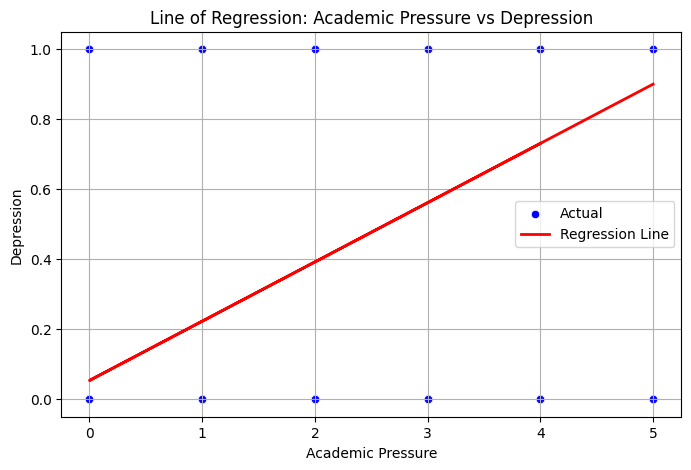

In [194]:
X_line = df_clean[['Academic Pressure']]
y_line = df_clean['Depression']
reg = LinearRegression()
reg.fit(X_line, y_line)
y_pred_line = reg.predict(X_line)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_line['Academic Pressure'], y=y_line, color='blue', label='Actual')
plt.plot(X_line, y_pred_line, color='red', linewidth=2, label='Regression Line')
plt.title('Line of Regression: Academic Pressure vs Depression')
plt.xlabel('Academic Pressure')
plt.ylabel('Depression')
plt.legend()
plt.grid(True)
plt.show()


In [198]:
y_pred_line = reg.predict(X_line)
mse = mean_squared_error(y_line, y_pred_line)
standard_error = np.sqrt(mse)

print("Standard Error of Estimate:", round(standard_error, 4))


Standard Error of Estimate: 0.4336


In [202]:
from scipy.stats import spearmanr

corr_ap, p_ap = spearmanr(df_clean['Academic Pressure'], df_clean['Depression'])
print("Spearman Correlation (Academic Pressure vs Depression):", round(corr_ap, 4), " | p-value:", round(p_ap, 4))
corr_sd, p_sd = spearmanr(df_clean['Sleep Duration'], df_clean['Depression'])
print("Spearman Correlation (Sleep Duration vs Depression):", round(corr_sd, 4), " | p-value:", round(p_sd, 4))
corr_fs, p_fs = spearmanr(df_clean['Financial Stress'], df_clean['Depression'])
print("Spearman Correlation (Financial Stress vs Depression):", round(corr_fs, 4), " | p-value:", round(p_fs, 4))


Spearman Correlation (Academic Pressure vs Depression): 0.4724  | p-value: 0.0
Spearman Correlation (Sleep Duration vs Depression): -0.0221  | p-value: 0.0002
Spearman Correlation (Financial Stress vs Depression): 0.3626  | p-value: 0.0


In [206]:
X_single = df_clean[['Academic Pressure']].values
y_single = df_clean['Depression'].values
single_reg = LinearRegression()
single_reg.fit(X_single, y_single)

y_pred_single = single_reg.predict(X_single)
print("Single Linear Regression (Academic Pressure → Depression)")
print("Coefficient:", single_reg.coef_[0])
print("Intercept:", single_reg.intercept_)
print("R^2 Score:", single_reg.score(X_single, y_single))


Single Linear Regression (Academic Pressure → Depression)
Coefficient: 0.1693310222638677
Intercept: 0.053593821573701406
R^2 Score: 0.225468224025119


In [210]:
X_multi = df_clean[["Academic Pressure", "Sleep Duration", "Financial Stress"]]
y_multi = df_clean["Depression"]
multi_reg = LinearRegression()
multi_reg.fit(X_multi, y_multi)
y_pred_multi = multi_reg.predict(X_multi)
print("Multiple Linear Regression")
print("Coefficients:", multi_reg.coef_)
print("Intercept:", multi_reg.intercept_)
print("R^2 Score:", multi_reg.score(X_multi, y_multi))


Multiple Linear Regression
Coefficients: [ 0.15317466 -0.00880257  0.10221436]
Intercept: -0.10110780380002604
R^2 Score: 0.31276699778516226


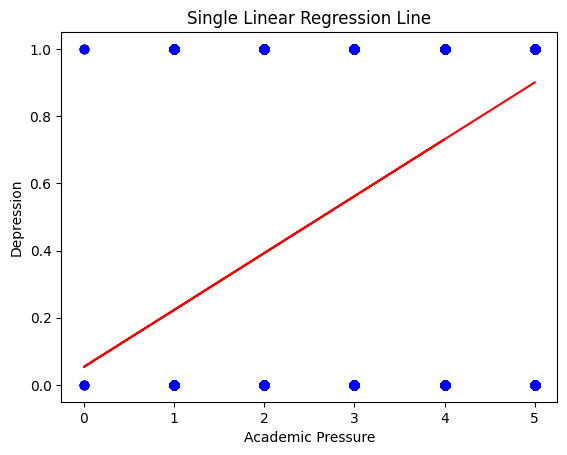

In [214]:
plt.scatter(df_clean["Academic Pressure"], df_clean["Depression"], color='blue')
plt.plot(df_clean["Academic Pressure"], y_pred_single, color='red')
plt.xlabel("Academic Pressure")
plt.ylabel("Depression")
plt.title("Single Linear Regression Line")
plt.show()
